<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/IBM_max_Army.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2022 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


# solve_with_time_limit_sample_sat

<table align="left">
<td>
<a href="https://colab.research.google.com/github/google/or-tools/blob/main/examples/notebook/sat/solve_with_time_limit_sample_sat.ipynb"><img src="https://raw.githubusercontent.com/google/or-tools/main/tools/colab_32px.png"/>Run in Google Colab</a>
</td>
<td>
<a href="https://github.com/google/or-tools/blob/main/ortools/sat/samples/solve_with_time_limit_sample_sat.py"><img src="https://raw.githubusercontent.com/google/or-tools/main/tools/github_32px.png"/>View source on GitHub</a>
</td>
</table>

First, you must install [ortools](https://pypi.org/project/ortools/) package in this colab.

In [2]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 31.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [3]:
counter = 0
data = {}
for r in range(8):
  for c in range(8):
    counter+=1
    data[counter,'X'] = c
    data[counter,'Y'] = r
allowed = [ (1,2),(1,-2) , (-1,2), (-1,-2) , (2,1), (2,-1) , (-2,-1),(-2,1) ]

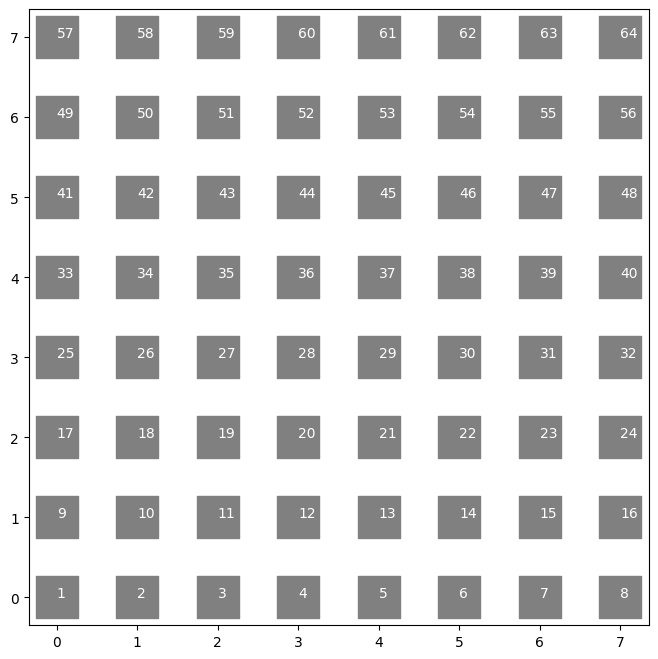

In [4]:
plt.figure(figsize=(8,8))
NR= {}
NQ = {}
Nking= {}
Nknight = {}
NB= {}
def dist(n,counter):
  return np.sqrt( (data[counter,'X'] - data[n,'X'])**2 + (data[counter,'Y'] - data[n,'Y'])**2  )
nodes = [n for n in range(1,1+64)]

for counter in nodes:
  x = data[counter,'X']
  y = data[counter,'Y']
  plt.scatter(x,y,s=900, marker = 's', c='grey')
  plt.text(x,y,s=str(counter), c='w')
  NR[counter] = [n for n in nodes if n!=counter and (data[counter,'X'] == data[n,'X'] or data[counter,'Y'] == data[n,'Y'] )]
  Nking[counter] = [n for n in nodes if n!=counter and dist(n,counter)<= np.sqrt(2) ]
  NQ[counter] = [n for n in nodes if n!=counter and (data[counter,'X'] == data[n,'X'] or data[counter,'Y'] == data[n,'Y'] or   abs(data[counter,'X'] - data[n,'X']) == abs( data[counter,'Y'] - data[n,'Y'] )  )]
  Nknight[counter] = [n for n in nodes if n!=counter and (data[counter,'X']- data[n,'X'], data[counter,'Y'] - data[n,'Y']) in allowed]
  NB[counter] = [n for n in nodes if n!=counter and (abs(data[counter,'X'] - data[n,'X']) == abs( data[counter,'Y'] - data[n,'Y'] )  )]



Solves a problem with a time limit.


OF =  2 278.0
success


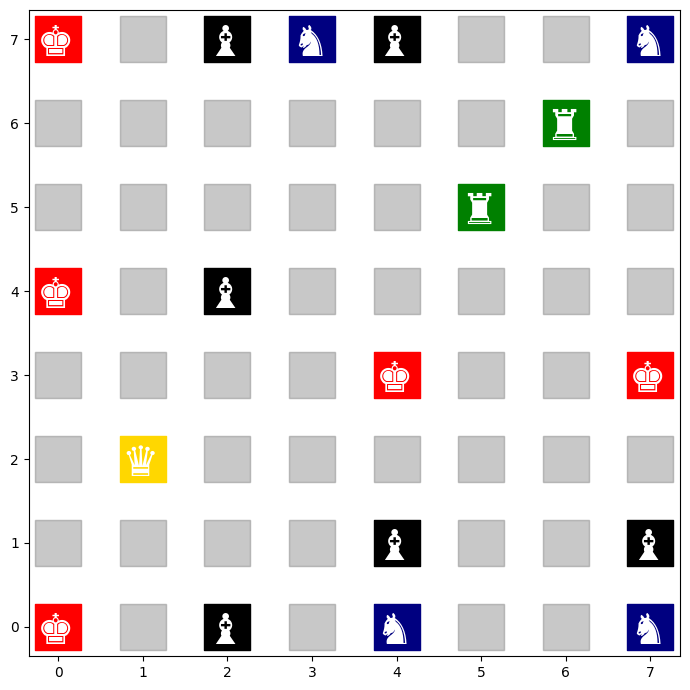

In [9]:
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt

import matplotlib.pyplot as pyplot
from matplotlib.font_manager import FontProperties

def SolveWithTimeLimitSampleSat():
    """Minimal CP-SAT example to showcase calling the solver."""
    # Creates the model.
    model = cp_model.CpModel()
    # Creates the variables.
    pieces = ['K', 'R', 'Q', 'N', 'B' ]
    val= {'K':14, 'R':28, 'Q':28, 'N':7, 'B':16 }
    symb= {'K':"\u265A", 'R':"\u265C", 'Q':"\u265B", 'N':"\u265E", 'B':"\u265D" }
    U = {(n,p):model.NewBoolVar(f'assign_{n}_{p}') for n in nodes for p in pieces}
    Occupied = {n:model.NewBoolVar(f'O_{n}') for n in nodes}

    for p in pieces:
      expressions = [U[n,p] for n in nodes]
      model.AddAtLeastOne(expressions)

    for n in nodes:
      expressions = [U[n,p] for p in pieces]
      model.Add(sum(expressions) == Occupied[n])
      model.AddAtMostOne(expressions)
      expressions_king_around   = [U[counter,'K'] for counter in nodes if counter in Nking[n] ]
      expressions_rook_around   = [U[counter,'R'] for counter in nodes if counter in NR[n] ]
      expressions_queen_around  = [U[counter,'Q'] for counter in nodes if counter in NQ[n] ]
      expressions_knight_around = [U[counter,'N'] for counter in nodes if counter in Nknight[n] ]
      expressions_bishop_around = [U[counter,'B'] for counter in nodes if counter in NB[n] ]

      around = expressions_king_around + expressions_rook_around + expressions_queen_around + expressions_knight_around + expressions_bishop_around
      model.Add( sum(around) == 0 ).OnlyEnforceIf(Occupied[n])


    expressions_of = [val[p]*v for (n,p),v in U.items() ]
    model.Maximize(sum(expressions_of))
    solver = cp_model.CpSolver()
    solver.parameters.max_time_in_seconds = 30.0
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
      print('OF = ', status, solver.ObjectiveValue())
      print('success')
      KOLOR = ['r','g', 'gold','navy', 'k']
      plt.figure(figsize=(7,7))
      for (n,p),v in U.items():
        x,y =data[n,'X'],data[n,'Y']

        if solver.Value(Occupied[n])==0:
          plt.scatter(x,y,s=1100, marker = 's', c='grey', alpha= 0.1)
        if solver.Value(v)>0:
          cc= KOLOR[pieces.index(p)]

          plt.scatter(x,y,s=1100, marker = 's', c=cc)
          prop = FontProperties()
          plt.text(x-0.25,y-0.2,s=symb[p], c='w', fontsize= 30, fontproperties=prop)

      plt.tight_layout()
      plt.show()


SolveWithTimeLimitSampleSat()

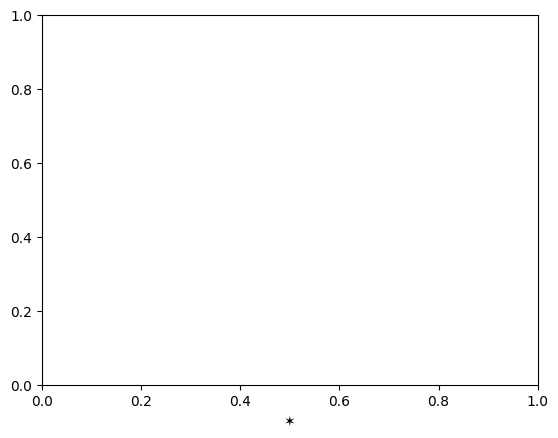